In [1]:
from instruments.ATS9872_driver import * # alazar
from instruments.DG645_driver import * # delay generator
from instruments.M8195A_driver import * # awg
from instruments.E8257D_driver import * #RF source
from instruments.Agilent11713C_driver import * # attenuator
from instruments.SIM928_driver import * # Voltage source
from instruments.SIM970_driver import * # Voltage meter

import numpy as np
from time import sleep
from IPython.display import clear_output
import matplotlib.pyplot as plt
import pandas

In [2]:
import measurements.sweep_pulse as sweep_pulse
import measurements.rabi as rabi
import measurements.rabi_map as rabi_map
import measurements.T1 as T1
import measurements.ramsey as ramsey
import measurements.ramsey_map as ramsey_map
import measurements.powersweep_pulse as powersweep_pulse
import measurements.fluxsweep_pulse as fluxsweep_pulse
import measurements.twotone_pulse as twotone_pulse
import measurements.T1_map as T1_map

In [3]:
import measurements.T1 as T1

In [4]:
from importlib import reload

In [5]:
awg = M8195A_driver('169.254.101.100')

In [6]:

dg = DG645_driver('TCPIP0::169.254.101.106::inst0::INSTR') # Delay generator
alazar = ATS9872_driver()

att = Agilent11713C_driver('TCPIP0::169.254.101.101::inst0::INSTR')
RFsourceMeasurement = E8257D_driver('TCPIP0::169.254.101.103::inst0::INSTR')
RFsourceExcitation = E8257D_driver('TCPIP0::169.254.101.104::inst0::INSTR')
Voltsource = SIM928_driver('GPIB0::2::INSTR',8,step_time=0.1,step_voltage=0.001) # voltsouce step_time, step_voltage
Voltmeter = SIM970_driver('GPIB0::2::INSTR',5)

# Pulse Debug

In [6]:
RFsourceMeasurement.start_mod()
RFsourceMeasurement.start_pulse()
RFsourceMeasurement.set_pulse_trigger_external()
#RFsourceMeasurement.setPulsePolarityInverted() # for awg
RFsourceMeasurement.setPulsePolarityNormal() # for delay generator

RFsourceExcitation.start_mod()
RFsourceExcitation.start_pulse()
RFsourceExcitation.set_pulse_trigger_external()
RFsourceExcitation.setPulsePolarityNormal()
#RFsourceExcitation.setPulsePolarityInverted()

In [7]:
RFsourceExcitation.stop_rf()
RFsourceMeasurement.stop_rf()

In [7]:
awg.stop()

In [ ]:
RFsourceExcitation.start_rf()

In [307]:
RFsourceMeasurement.start_rf()

In [116]:
awg.setCWFrequency(70e6,channel=1)
awg.start()

In [113]:
frequency = 7400e6 - 70e6
RFsourceMeasurement.set_frequency(frequency)
RFsourceMeasurement.set_amplitude(18)
RFsourceMeasurement.start_rf()


In [361]:
awg.setVoltage(1,0)

AWG Response: 0,"No error"


In [43]:
samplingRate = 1e9
decimationValue = 1
pulseMeasurementLength = 5e-6
nBuffer = 100
recordPerBuffers = 50 # number of pulses per point of measurement: nBuffer times recordPerBuffers. In that example 25*20 = 500
pulsesPeriod = 500e-6
powerReference_dBm = -9

dg.setLevelAmplitude(1,3) # Set AB to 3 Volts
dg.setLevelAmplitude(2,3) # Set CD to 3 Volts
dg.setTriggerSource(5) # Set trigger to be controlled by me
dg.setBurstCount(int(nBuffer*recordPerBuffers)) # set number of shots
dg.setBurstPeriod(pulsesPeriod) # set period between shots
dg.setBurstMode(1) 

# 1 T0
# 2 A
# 3 B
# 4 C
# 5 D
# ...


# 2 -> A 3 -> B
# 4 -> C 5 -> D

# pulsesPeriod
# |------------------------------------------------------------------------------|
# _________________         _____                                                _________________         _____ 
# |                 |       |     |                                              |                 |       |     |
# |                 |       |     |                                              |                 |       |     |
# |                 |_______|     |______________________________________________|                 |_______|     |_____ ...

# |-----------------|       |-----|
# A                 B       C     D
# excitation                 measurement
#
#                   |-------|
#                   B       C
#                    delay



dg.setDelay(3,2,0E-9) #B in relation to A Excitation Pulse
dg.setDelay(4,3,0) # C in relation to B # Delay between excitation and measurement
dg.setDelay(5,4,pulseMeasurementLength) # D in relation to C length of measurement Pulse

pointsPerRecord = int(pulseMeasurementLength*samplingRate/decimationValue/256)*256

In [59]:

Voltsource.turn_on()
Voltsource.ramp_voltage(0.16)


In [58]:

Voltsource.ramp_voltage(0)

In [45]:
dg.startTrigger()

In [44]:
I,Q = alazar.capture(0,pointsPerRecord,nBuffer,recordPerBuffers,-9,save=True,waveformHeadCut=500, decimation_value = 1)

In [119]:
Amp  = np.sqrt(I**2+Q**2)
20*np.log10(Amp)

-48.78990341702536

# Measuring IQ

In [79]:
df = pandas.read_csv('dataIQ.csv')

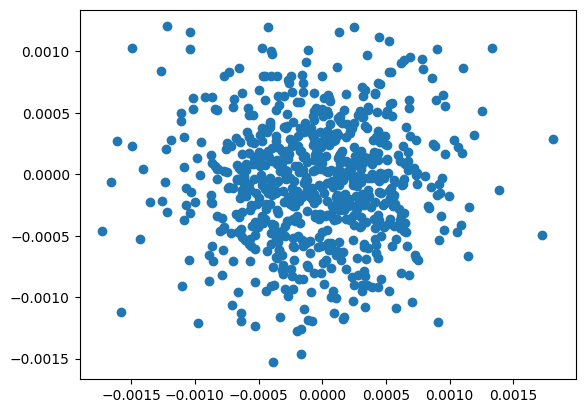

In [80]:
plt.scatter(df['I'],df['Q'])

# Checking Pulses

In [46]:
f = open('data.bin','rb')
data = f.read()
f.close()

In [47]:
a = np.frombuffer(data, dtype=np.uint8)

(0.0, 256.0)

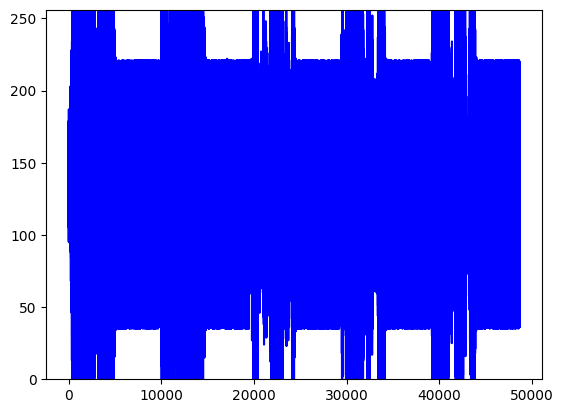

In [48]:
plt.plot(a[:pointsPerRecord*10],color='blue')
#plt.plot(a[pointsPerRecord:pointsPerRecord*2],color='orange')
plt.ylim(0,256)

(0.0, 1000.0)

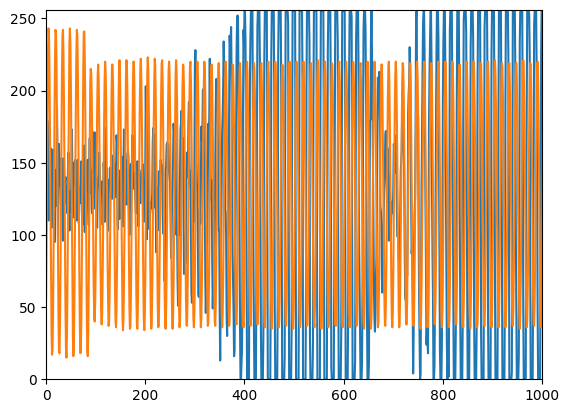

In [49]:
plt.plot(a[:pointsPerRecord])
plt.plot(a[pointsPerRecord:2*pointsPerRecord])
plt.ylim(0,256)
plt.xlim(00,1000)
#plt.xlim(23832,24832)

# Measurements

## Cavity Peak

In [74]:
RFsourceExcitation.is_on()

False

In [50]:
voltage = 0
rf_amp = 18
attenuator_att = 50 
center_freq = 7400e6
span_freq = 10e6
step_freq = 0.5e6
if_freq = 70e6
qubitname = "Transmon3D"
voltageSourceState = True
rfExcitationState = True
RFExcitationFreq = 4991e6
RFExcitationAmp = -10
RFExcitationLength = 190e-9
nBuffer = 500
recordPerBuffers = 100
waveformHeadCut = 500
pulsesPeriod = 100e-6
pulseMeasurementLength = 5e-6
delayBetweenPulses = 0
ampReference = -9
decimation_value = 1
currentResistance = 1e3

            

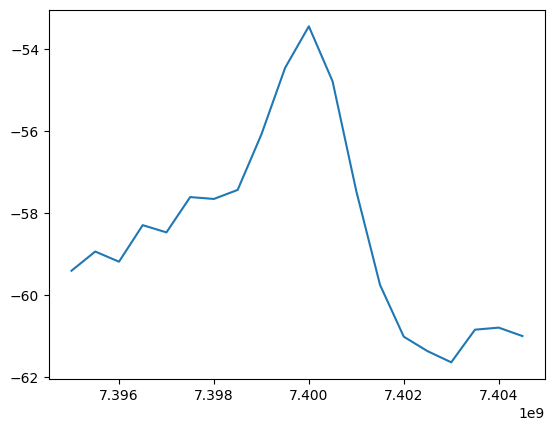

'Transmon3D_20240420_0926_sweep_pulse_cfreq_7400.npz'

In [51]:
sweep_pulse.measure(alazar,
                    awg, 
                    dg,
                    att,
                    RFsourceMeasurement,
                    RFsourceExcitation,
                    Voltsource,
                    voltage,
                    rf_amp,
                    attenuator_att, 
                    center_freq,
                    span_freq,
                    step_freq, 
                    if_freq,
                    qubitname,
                    voltageSourceState,
                    rfExcitationState,
                    RFExcitationFreq,
                    RFExcitationAmp,
                    RFExcitationLength,
                    nBuffer, 
                    recordPerBuffers, 
                    waveformHeadCut,
                    pulsesPeriod,
                    pulseMeasurementLength,
                    delayBetweenPulses,
                    ampReference,
                    decimation_value,
                    currentResistance)

In [10]:
data = np.load('Transmon3D_20240416_1623_sweep_pulse_cfreq_7400.npz')

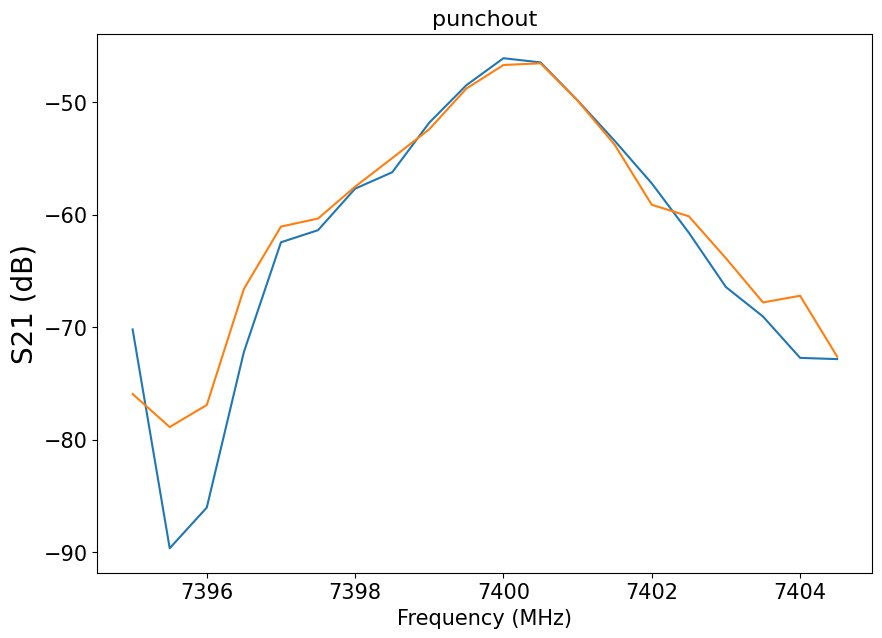

In [30]:
#voltage: 0
#rf_amp: 19
#attenuator_att: 5
#center_freq: 7400000000.0
#span_freq: 100000000.0
#step_freq: 1000000.0
#if_freq: 70000000.0
#qubitname: Transmon3D
#voltageSourceState: False
#nBuffer: 20
#recordPerBuffers: 25
#waveformHeadCut: 500
#pulsesPeriod: 0.0001
#pulseMeasurementLength: 1e-05
#ampReference: -9
#decimation_value:1
#currentResistance:1000.0
#HOW TO PLOT
data = np.load('Transmon3D_20240420_0901_sweep_pulse_cfreq_7400.npz')
data2 = np.load('Transmon3D_20240420_0902_sweep_pulse_cfreq_7400.npz')
data3 = np.load('Transmon3D_20240418_1749_sweep_pulse_cfreq_7400.npz')
data4 = np.load('Transmon3D_20240418_1753_sweep_pulse_cfreq_7400.npz')
freqs = data['freqs']
mag = np.abs(data['Z'])
mag2 = np.abs(data2['Z'])
mag3 = np.abs(data3['Z'])
mag4 = np.abs(data4['Z'])
phase = np.unwrap(np.angle(data['Z']))
fig = plt.figure(figsize=(10,7))
ax = fig.gca()
plt.plot(freqs*1e-6,20*np.log10(mag))
plt.plot(freqs*1e-6,20*np.log10(mag2))
#plt.plot(freqs*1e-6,20*np.log10(mag3))
#plt.plot(freqs*1e-6,20*np.log10(mag4))
ax.tick_params(labelsize=15)
ax.set_xlabel('Frequency (MHz)',fontsize=15)
ax.set_ylabel('S21 (dB)',fontsize=20)
ax.set_title('punchout',fontsize=16)
plt.show()



In [33]:
CavityFrequency = 7400e6


# Pulsed Power Sweep

In [31]:
voltage = 0
rf_amp = 18
attenuator_att_init = 0
attenuator_att_final = 60
attenuator_att_step = 1
center_freq = 7400e6
span_freq = 50e6
step_freq = 1e6
if_freq = 70e6
qubitname = "Transmon3D"
voltageSourceState = False
nBuffer = 500
recordPerBuffers = 100
waveformHeadCut = 500
pulsesPeriod = 100e-6
pulseMeasurementLength = 5e-6
ampReference = -9
decimation_value = 1
currentResistance = 1e3
voltageSourceState = True

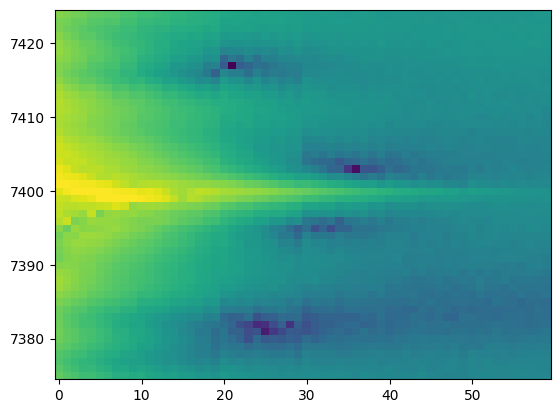

'Transmon3D_20240418_1106_powersweep_pulse_cfreq_7400.npz'

In [32]:
powersweep_pulse.measure(alazar,
                         awg,
                         dg,
                         att,
                         RFsourceMeasurement,
                         Voltsource,
                         voltage,
                         rf_amp,
                         attenuator_att_init,
                         attenuator_att_final,
                         attenuator_att_step, 
                         center_freq,
                         span_freq,
                         step_freq, 
                         if_freq, 
                         qubitname,
                         voltageSourceState,  
                         nBuffer, 
                         recordPerBuffers, 
                         waveformHeadCut,
                         pulsesPeriod,
                         pulseMeasurementLength,
                         ampReference,
                         decimation_value,
                        currentResistance=1e3)

#  Pulsed Fluxsweep

In [28]:
voltage_center = np.arange(-0.1,0.1,0.005)
voltage_left = np.arange(-1,-0.1,0.05)
voltage_right = np.arange(0.15,1.05,0.05)

In [32]:
#voltages = np.append(np.append(voltage_left,voltage_center),voltage_right)
voltages = np.arange(-1,-0.9,0.005)

In [56]:
voltage_init = -0.05
voltage_final = 0.05
voltage_step = 0.001
rf_amp = 18
attenuator_att= 50
center_freq = 7400e6
span_freq = 5e6
step_freq = 0.1e6
if_freq = 70e6
qubitname = 'Transmon3D'
nBuffer = 600
recordPerBuffers = 100
waveformHeadCut = 500
pulsesPeriod = 100e-6
pulseLength = 5e-6     
ampReference = -9
currentResistance = 8e3
decimation_value = 1


'Transmon3D_20240421_0833_fluxsweep_pulse_cfreq_7400.npz'

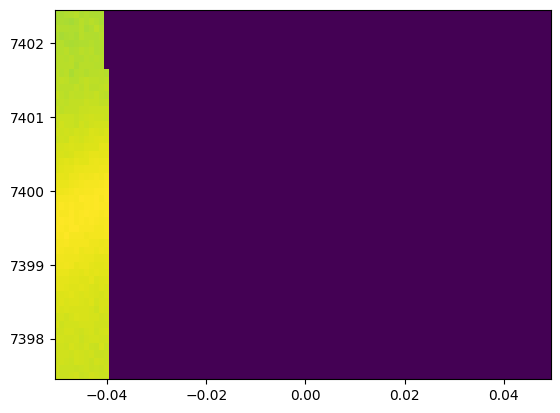

In [57]:
fluxsweep_pulse.measure(alazar,
            awg,
            dg,
            att,
            RFsourceMeasurement,
            Voltsource,
            voltage_init,
            voltage_final,
            voltage_step,
            rf_amp,
            attenuator_att,
            center_freq,
            span_freq,
            step_freq, 
            if_freq,
            qubitname, 
            nBuffer,
            recordPerBuffers,
            waveformHeadCut,
            pulsesPeriod,
            pulseLength,
            ampReference,
            currentResistance,
            decimation_value)#,list_voltages = voltages)

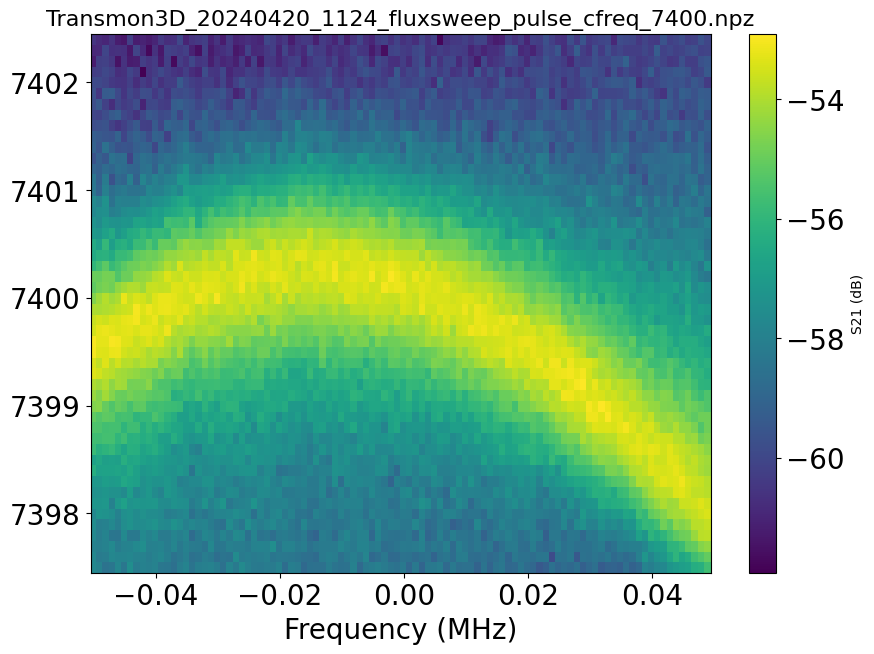

In [58]:
fluxsweep_pulse.plot('Transmon3D_20240420_1124_fluxsweep_pulse_cfreq_7400.npz')

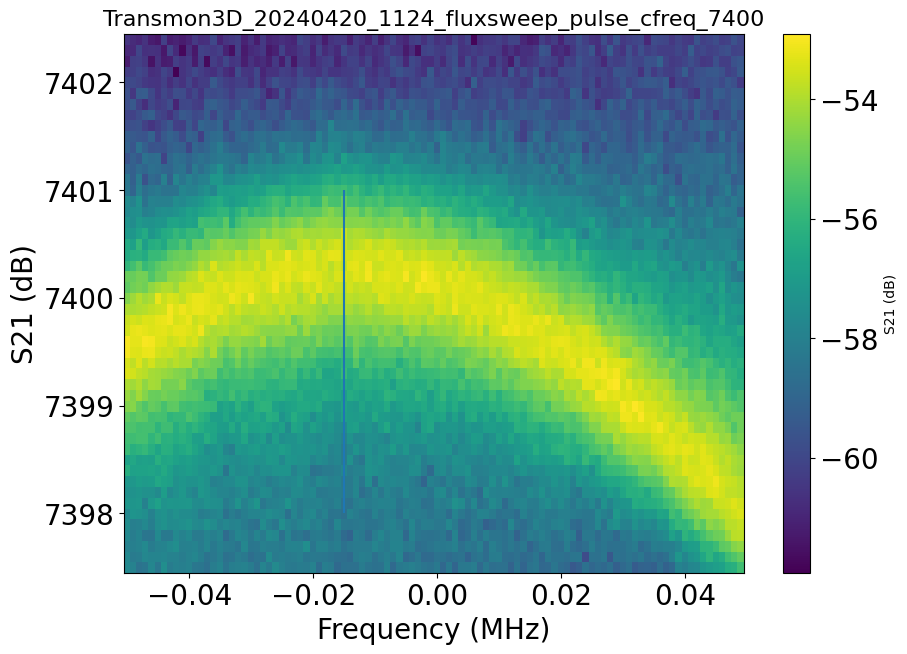

In [66]:
#voltage_init: -0.05
#voltage_final: 0.05
#voltage_step: 0.001
#rf_amp: 18
#attenuator_att: 50
#center_freq: 7400000000.0
#span_freq: 5000000.0
#step_freq: 100000.0
#if_freq: 70000000.0
#qubitname: Transmon3D
#nBuffer: 600
#recordPerBuffers: 100
#waveformHeadCut: 500
#pulsesPeriod: 0.0001
#pulseMeasurementLength: 5e-06
#ampReference: -9
#currentResistance: 8000.0
#decimation_value:1

#HOW TO PLOT
data = np.load('Transmon3D_20240420_1124_fluxsweep_pulse_cfreq_7400.npz')
freqs = data['freqs']
mags = np.abs(data['Z'])
voltages =data['voltages']
phase = np.unwrap(np.angle(data['Z']))
fig = plt.figure(figsize=(10,7))
ax = fig.gca()
plt.pcolor(voltages,freqs*1e-6,20*np.log10(mags.T))
cbar=plt.colorbar(label='S21 (dB)')
cbar.ax.tick_params(labelsize=20)
ax.tick_params(labelsize=20)
ax.set_xlabel('Frequency (MHz)',fontsize=20)
ax.set_ylabel('S21 (dB)',fontsize=20)
ax.set_title('Transmon3D_20240420_1124_fluxsweep_pulse_cfreq_7400',fontsize=16)
plt.vlines(-0.015,7398,7401)
plt.show()

# Pulsed Twotone

In [79]:
Voltsource.get_voltage()

0.0

In [86]:
voltage = -0.015
attenuator_att = 30
freqMeasurement = 7400e6
if_freq = 70e6
qubitname = 'olivier_sample'
voltageSourceState = True
nBuffer = 100
recordPerBuffers = 50
waveformHeadCut = 500
pulsesPeriod = 100e-6
pulseMeasurementLength = 5e-6
pulseExcitationLength = 200e-9
delayBetweenPulses = 0
ampReference = -9
decimation_value = 1 #  1 GHz/ decimation_value

rf_excitation_amp = -10
rf_measurement_amp= 18

qfreq = 5012e6
delta = 1e6

RFSource_frequency_initial = qfreq-delta/2
RFSource_frequency_final = qfreq+delta/2
RFSource_frequency_step = 0.001e6

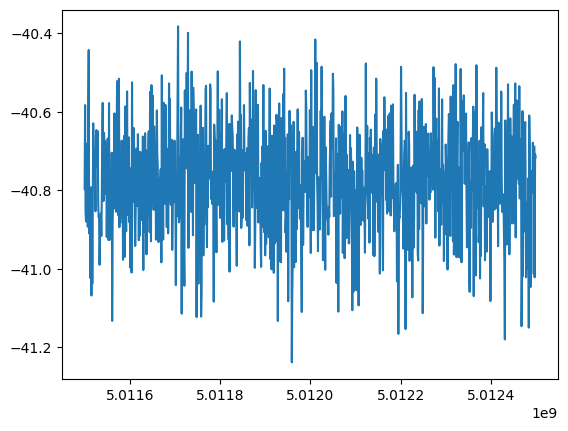

'olivier_sample_20240421_0952_twotone_pulse_cfreq_7400.npz'

In [87]:
twotone_pulse.measure(alazar,
                      awg,
                      dg,
                      att,
                      RFsourceMeasurement,
                      RFsourceExcitation,
                      Voltsource,
                      freqMeasurement,
                      voltage,
                      rf_excitation_amp,
                      rf_measurement_amp,
                      attenuator_att, 
                      RFSource_frequency_initial,
                      RFSource_frequency_final,
                      RFSource_frequency_step, 
                      if_freq,
                      qubitname,
                      voltageSourceState,
                      nBuffer,
                      recordPerBuffers, 
                      waveformHeadCut,
                      pulsesPeriod,
                      pulseMeasurementLength,
                      delayBetweenPulses,
                      pulseExcitationLength,
                      ampReference,
                      decimation_value,
                     currentResistance=8e3)

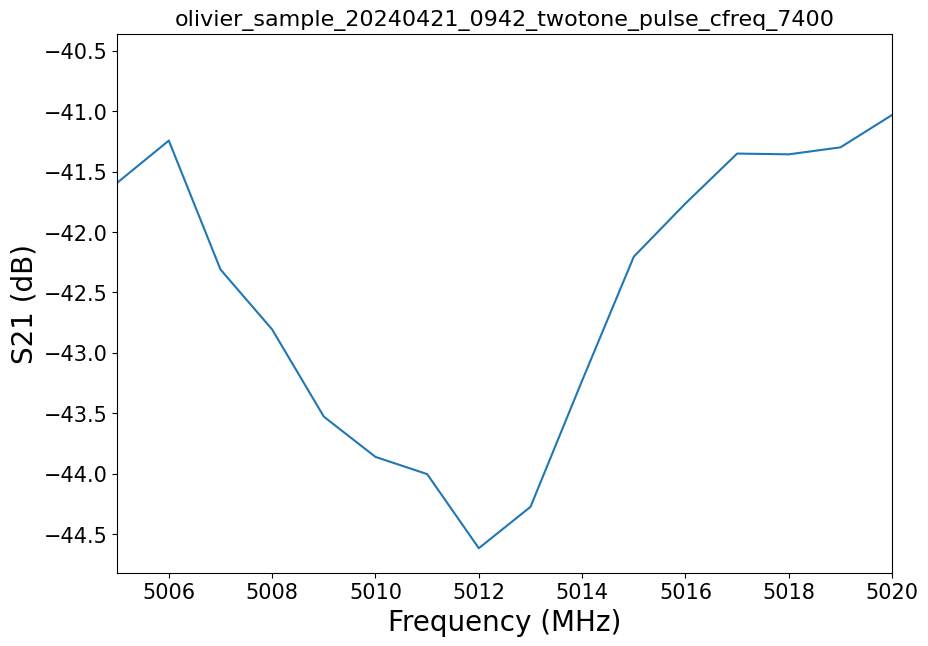

In [90]:

data = np.load('olivier_sample_20240421_0942_twotone_pulse_cfreq_7400.npz')
freqs = data['freqs']
mag = np.abs(data['Z'])
phase = np.unwrap(np.angle(data['Z']))
fig = plt.figure(figsize=(10,7))
ax = fig.gca()
plt.plot(freqs*1e-6,20*np.log10(mag))
#plt.plot(freqs*1e-6,mag)
ax.tick_params(labelsize=15)
plt.xlim(5005,5020)
ax.set_xlabel('Frequency (MHz)',fontsize=20)
ax.set_ylabel('S21 (dB)',fontsize=20)
ax.set_title('olivier_sample_20240421_0942_twotone_pulse_cfreq_7400',fontsize=16)
plt.show()

#  Rabi Oscillation

In [7]:
Voltsource.get_voltage()

-0.015

In [44]:
RFsourceMeasurement.stop_rf()
RFsourceExcitation.stop_rf
awg.stop()

In [46]:
voltage = -0.015
rf_amp = 18
attenuator_att = 30
freqMeasurement = 7400e6
QubitFrequency = 5012e6
if_freq = 70e6
qubitname = 'olivier_sample'
voltageSourceState = True
nBuffer = 100
recordPerBuffers = 50
waveformHeadCut = 500
pulsesPeriod = 100e-6
pulseMeasurementLength = 5e-6
delayBetweenPulses = 0
ampReference = -9
decimation_value = 1 #  1 GHz/ decimation_value

rf_excitation_amp = -13
rf_measurement_amp= 18
pulseExcitationLength_init = 120e-9 
pulseExcitationLength_final = 700e-9
pulseExcitationLength_step = 10e-9

freqExcitation = QubitFrequency


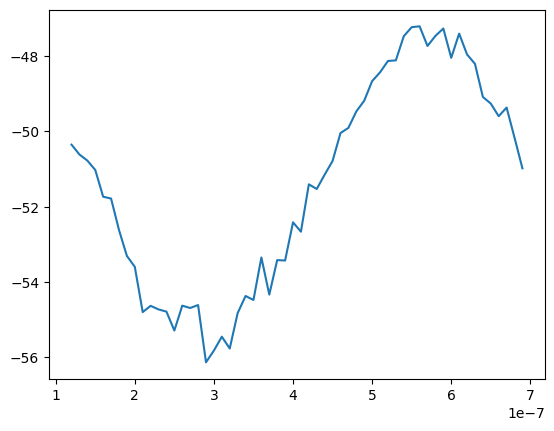

'olivier_sample_20240422_1034_rabi_cfreq_7400.npz'

In [47]:
rabi.measure(alazar,
        awg, 
        dg,
        att,
        RFsourceMeasurement,
        RFsourceExcitation,
        Voltsource,
        freqMeasurement,
        freqExcitation,
        voltage,
        rf_excitation_amp,
        rf_measurement_amp,
        attenuator_att,
        pulseExcitationLength_init,
        pulseExcitationLength_final,
        pulseExcitationLength_step,
        if_freq, 
        qubitname,
        voltageSourceState,  
        nBuffer, 
        recordPerBuffers, 
        waveformHeadCut,
        pulsesPeriod,
        pulseMeasurementLength,
        delayBetweenPulses,
        ampReference,
        decimation_value,
            currentResistance=8e3)

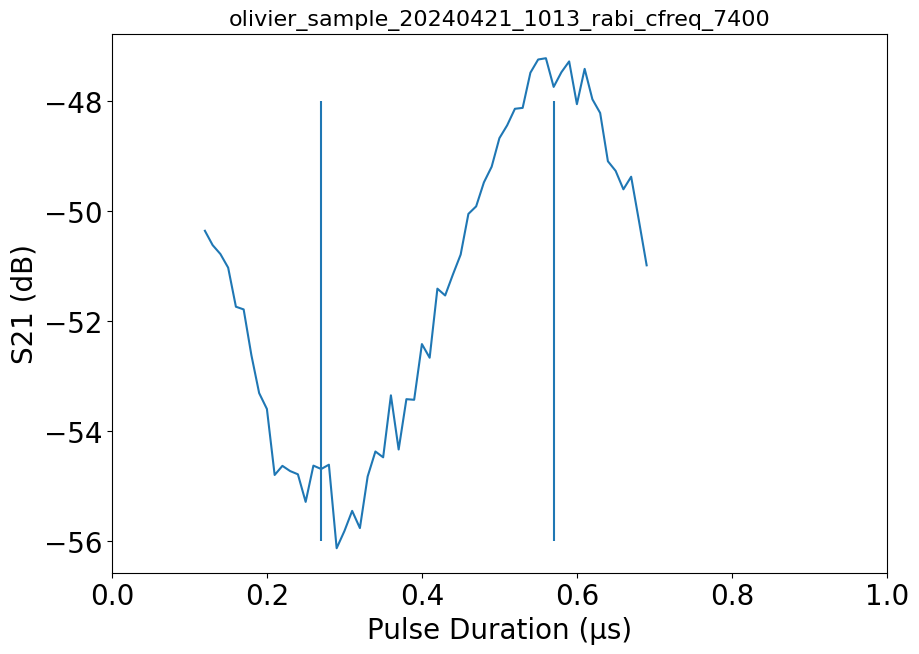

In [54]:

data = np.load('olivier_sample_20240422_1034_rabi_cfreq_7400.npz')
data2 = np.load('olivier_sample_20240421_1017_rabi_cfreq_7400.npz')
duration = data['duration']
mag = np.abs(data['Z'])
mag2 = np.abs(data2['Z'])
phase = np.unwrap(np.angle(data['Z']))
fig = plt.figure(figsize=(10,7))
ax = fig.gca()
plt.plot(duration*1e6,20*np.log10(mag))
#plt.plot(duration*1e6,mag)
#plt.plot(duration*1e6,20*np.log10(mag2))
ax.tick_params(labelsize=20)
ax.set_xlabel('Pulse Duration (µs)',fontsize=20)
ax.set_ylabel('S21 (dB)',fontsize=20)
ax.set_title('olivier_sample_20240421_1013_rabi_cfreq_7400',fontsize=16)
plt.xlim(0,1)
plt.vlines(0.270,-56,-48)
plt.vlines(0.570,-56,-48)
#plt.vlines((0.4+0.190)/2,-49,-40)
#plt.vlines(0.4,-49,-40)
plt.show()

In [81]:
RFsourceExcitation.stop_rf()
RFsourceMeasurement.stop_rf()
awg.stop()

# T1

In [22]:
voltage = -0.015
rf_amp = 18
attenuator_att = 30
freqMeasurement = 7400e6
if_freq = 70e6
qubitname = 'olivier_sample'
voltageSourceState = True
nBuffer = 200
recordPerBuffers = 70
waveformHeadCut = 500
pulsesPeriod = 120e-6
pulseMeasurementLength = 5e-6
delayBetweenPulses = 0
ampReference = -9
decimation_value = 1 #  1 GHz/ decimation_value

rf_excitation_amp = -13
rf_measurement_amp= 18
durationExcitation = 200e-9

delayBetweenPulses_init = 0
delayBetweenPulses_final = 120E-6
delayBetweenPulses_step = 5e-6

freqExcitation = 5012e6

excitationState = True

In [23]:
reload(T1)

<module 'measurements.T1' from 'C:\\Users\\Franscisco Rouxinol\\Developer\\MeasurementLFDQ\\src\\measurements\\T1.py'>

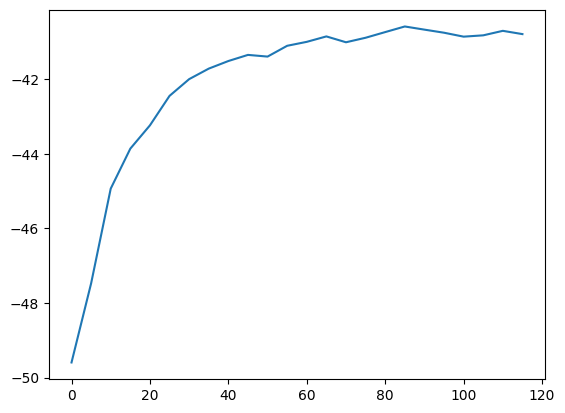

'olivier_sample_20240422_0855_T1_cfreq_7400.npz'

In [24]:
T1.measure(alazar,
            awg, 
            dg,
            att,
            RFsourceMeasurement,
            RFsourceExcitation,
            Voltsource,
            freqMeasurement,
            freqExcitation,
            durationExcitation,
            voltage,rf_excitation_amp,
            rf_measurement_amp,
            attenuator_att,
            if_freq,
            qubitname,
            voltageSourceState,
            excitationState,
            nBuffer,
            recordPerBuffers, 
            waveformHeadCut,
            pulsesPeriod,
            pulseMeasurementLength,
            delayBetweenPulses_init,
            delayBetweenPulses_final, 
            delayBetweenPulses_step,
            ampReference,
            decimation_value,
            currentResistance=8e3)

In [34]:
data_pi = np.load('olivier_sample_20240422_0855_T1_cfreq_7400.npz')
delay_pi = data_pi['delay']
mag_pi = np.abs(data_pi['Z'])
popt,pcov = curve_fit(T1f, delay_pi, mag_pi, p0=args_T1)
popt[2]*1e6

20.100472196844617

FileNotFoundError: [Errno 2] No such file or directory: 'olivier_sample_20240422_0835_T1_cfreq_7400.npz'

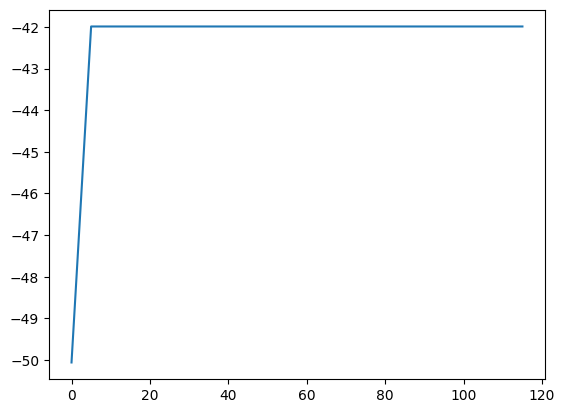

In [150]:
T1_data = np.array([])
T1_err_data = np.array([])
T1_timestampe_data = np.array([])
name = "20240421_T1_estability_v"+str(i)
i+=1
while True:

    filename = T1.measure(alazar,
            awg, 
            dg,
            att,
            RFsourceMeasurement,
            RFsourceExcitation,
            Voltsource,
            freqMeasurement,
            freqExcitation,
            durationExcitation,
            voltage,rf_excitation_amp,
            rf_measurement_amp,
            attenuator_att,
            if_freq,
            qubitname,
            voltageSourceState,
            excitationState,
            nBuffer,
            recordPerBuffers, 
            waveformHeadCut,
            pulsesPeriod,
            pulseMeasurementLength,
            delayBetweenPulses_init,
            delayBetweenPulses_final, 
            delayBetweenPulses_step,
            ampReference,
            decimation_value,
            currentResistance=8e3)
    data_pi = np.load(filename)
    delay_pi = data_pi['delay']
    mag_pi = np.abs(data_pi['Z'])
    popt,pcov = curve_fit(T1f, delay_pi, mag_pi, p0=args_T1)
    timestamp = filename.split("_")[2]+"_"+filename.split("_")[3]
    T1_fit = popt[2]
    T1_fit_err = np.sqrt(np.diag(pcov))[2]
    
    T1_data = np.append(T1_data,T1_fit)
    T1_err_data = np.append(T1_err_data,T1_fit_err)
    T1_timestampe_data =  np.append(T1_timestampe_data,timestamp)
    
    np.savez(name,T1=T1_data, err = T1_err_data, timestamp = T1_timestampe_data)
    data_pi.close()
    os.remove(filename)

In [151]:
data = np.load("20240421_T1_estability_v4.npz")

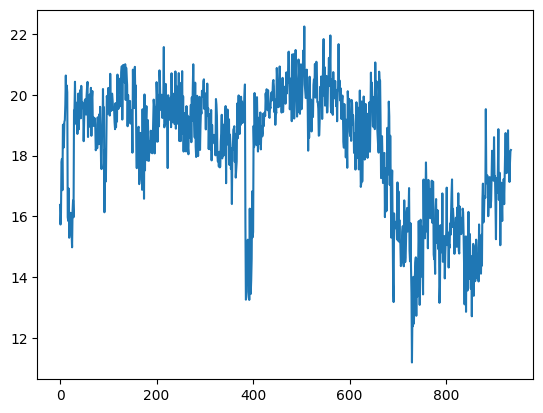

In [152]:
plt.plot(data['T1']*1e6)

In [110]:
delay_pi = data_pi['delay']
mag_pi = np.abs(data_pi['Z'])



In [28]:

def T1f(time, Const, Slope, T):   
    """
    Rabi curve using exponential decay: Const + Slope*exp(-time/Tr)*cos(2*pi*time/Period+Phase)

    """
    return (Const + Slope*np.exp(-time/T))

def T1_g(time, Const,Const1, Slope, T):
    """
    Rabi curve using gaussianan decay: Const + amp * N.exp(-0.5*((x-pos)/(wid))**2)

    """
    return (Const + Slope*np.exp(-0.5*(time+Const1)/T)**2)


In [26]:
from scipy.optimize import curve_fit

In [30]:
# T1 exponential

from scipy.optimize import curve_fit
args_T1 = [0.008,-0.002,14e-6] # initial parameter to fit
"""
[Const, Slope,T1]{Const + Slope*exp(-time/T1)}
"""
popt,pcov = curve_fit(T1f, delay_pi, mag_pi, p0=args_T1)   



In [31]:
popt[2]*1e6

20.100472196844617

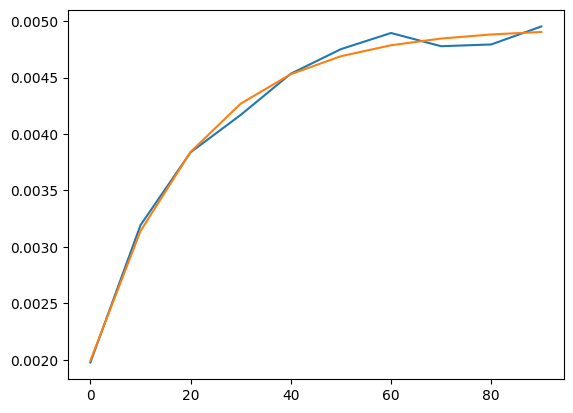

In [23]:
plt.plot(delay_pi*1e6,mag_pi)
plt.plot(delay_pi*1e6,T1(delay_pi,*popt))

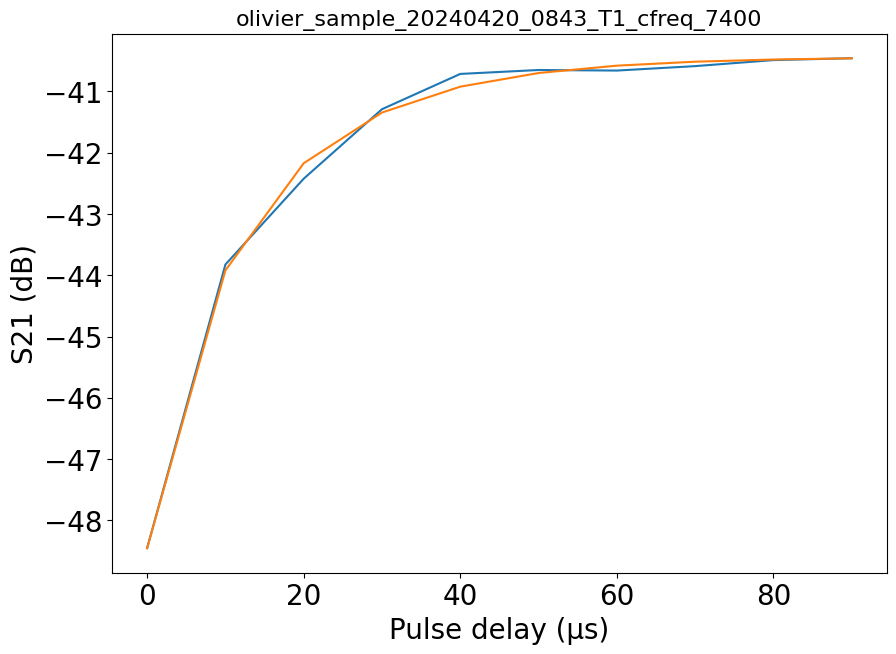

In [66]:
#freqMeasurement: 7349600000.0
#freqExcitation: 2150100000.0
#durationExcitation: 6.7e-07
#voltage: 0.16
#rf_excitation_amp: -10
#rf_measurement_amp: 18
#attenuator_att: 25
#if_freq: 70000000.0
#qubitname: olivier_sample
#voltageSourceState: True
#excitationState: True
#nBuffer: 50
#recordPerBuffers: 200
#waveformHeadCut: 500
#pulsesPeriod: 0.000585
#pulseMeasurementLength: 5e-06
#delayBetweenPulses_init: 0
#delayBetweenPulses_final: 0.0008
#delayBetweenPulses_step: 1e-05
#ampReference: -9
#decimation_value: 1
#currentResistance: 1000.0
#HOW TO PLOT
data = np.load('olivier_sample_20240420_0843_T1_cfreq_7400.npz')
delay = data['delay']
mag = np.abs(data['Z'])
phase = np.unwrap(np.angle(data['Z']))
fig = plt.figure(figsize=(10,7))
ax = fig.gca()
plt.plot(delay*1e6,20*np.log10(mag))
plt.plot(delay_pi*1e6,20*np.log10(T1(delay_pi,*popt)))
ax.tick_params(labelsize=20)
ax.set_xlabel('Pulse delay (µs)',fontsize=20)
ax.set_ylabel('S21 (dB)',fontsize=20)
ax.set_title('olivier_sample_20240420_0843_T1_cfreq_7400',fontsize=16)
plt.show()

#  Ramsey

In [93]:
reload(ramsey)

<module 'measurements.ramsey' from 'C:\\Users\\Franscisco Rouxinol\\Developer\\MeasurementLFDQ\\src\\measurements\\ramsey.py'>

In [78]:
voltage = -0.015
rf_amp = 18
attenuator_att = 30
freqMeasurement = 7400e6
if_freq = 70e6
qubitname = 'olivier_sample'
voltageSourceState = True
nBuffer = 100
recordPerBuffers = 50
waveformHeadCut = 500
pulsesPeriod = 100e-6
pulseMeasurementLength = 5e-6
delayBetweenPulses = 0
ampReference = -9
decimation_value = 1 #  1 GHz/ decimation_value

rf_excitation_amp = -13
rf_measurement_amp= 18
durationExcitation = 135e-9

delayBetweenPulses_init = 0e-9
delayBetweenPulses_final = 20E-6
delayBetweenPulses_step = 10e-9

freqExcitation = 5012e6

awg.stop()
try:
    get_error(awg._session,'')
except ValueError:
    pass

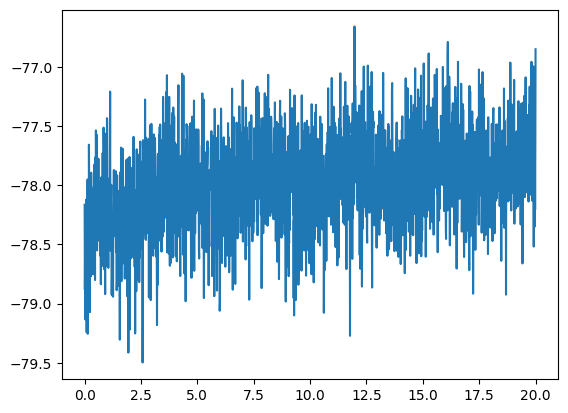

'olivier_sample_20240422_1823_ramsey_cfreq_7400.npz'

In [82]:
ramsey.measure(alazar,
        awg, 
        att,
        RFsourceMeasurement,
        RFsourceExcitation,
        Voltsource,
        freqMeasurement,
        freqExcitation,
        durationExcitation,
        voltage,rf_excitation_amp,
        rf_measurement_amp,
        attenuator_att,
        if_freq,
        qubitname,
        voltageSourceState,
        nBuffer,
        recordPerBuffers, 
        waveformHeadCut,
        pulsesPeriod,
        pulseMeasurementLength,
        delayBetweenPulses_init,
        delayBetweenPulses_final, 
        delayBetweenPulses_step,
        ampReference,
        decimation_value,
        currentResistance = 8e3,
        roundDelayArray = 8,
        saveData = True)

In [ ]:
ramsey_data = np.array([])
ramsey_err_data = np.array([])
ramsey_timestampe_data = np.array([])
name = "20240422_ramsey_estability_v"+str(i)
args_ramsey = [6e-03,0.002,10e-6,2e-6,91]
i+=1
while True:

    filename = ramsey.measure(alazar,
            awg, 
            dg,
            att,
            RFsourceMeasurement,
            RFsourceExcitation,
            Voltsource,
            freqMeasurement,
            freqExcitation,
            durationExcitation,
            voltage,rf_excitation_amp,
            rf_measurement_amp,
            attenuator_att,
            if_freq,
            qubitname,
            voltageSourceState,
            excitationState,
            nBuffer,
            recordPerBuffers, 
            waveformHeadCut,
            pulsesPeriod,
            pulseMeasurementLength,
            delayBetweenPulses_init,
            delayBetweenPulses_final, 
            delayBetweenPulses_step,
            ampReference,
            decimation_value,
            currentResistance=8e3)
    data_pi = np.load(filename)
    delay_pi = data_pi['delay']
    mag_pi = np.abs(data_pi['Z'])
    popt, pcov = curve_fit(Ramsey_e,delays,mag,args_ramsey,maxfev=100000,ftol=1e-30 ) 
    timestamp = filename.split("_")[2]+"_"+filename.split("_")[3]
    ramsey_fit = popt[2]
    ramsey_fit_err = np.sqrt(np.diag(pcov))[2]
    
    ramsey_data = np.append(ramsey_data,ramsey_fit)
    ramsey_err_data = np.append(ramsey_err_data,ramsey_fit_err)
    ramsey_timestampe_data =  np.append(ramsey_timestampe_data,timestamp)
    
    np.savez(name,ramsey = ramsey_data, err = ramsey_err_data, timestamp = ramsey_timestampe_data)
    data_pi.close()
    os.remove(filename)

In [70]:
###########################
  ###T2 #T2 #T2 #T2 #T2 # T2 ##########


# def T2(time, Const, Slope,Tr,Period,Phase):

# 	"""
# 	T2 curve using: Const + Slope*exp(-time/Tr)*cos(2*pi*time/Period+Phase)

# 	"""
# 	return (Const + Slope*exp(-time/Tr)*cos(2*pi*time*Period+Phase))

def Ramsey_g(time, Const, Slope,Tr,freq,Phase):
#     Const,Const1, Slope,Tr,freq,Phase = args
    """
    T2 curve using gaussian decay: (Const + Slope*exp(-0.5*((time-Const1)/Tr)**2)*cos( (2*pi*time/freq) + Phase))
    """
    
    return  (Const + Slope*np.exp(-0.5*(time/Tr)**2)*np.cos( (2*np.pi*time/freq) + Phase))

def Ramsey_e(time, Const, Slope,Tr,freq,Phase):
    
#     Const, Const1, Slope, Tr, freq, Phase = args
    """
    T2 curve using exponential decay: (Const + Slope*exp(-0.5*((time-Const1)/Tr)**2)*cos( (2*pi*time/freq) + Phase))
    """
    return (Const + Slope*np.exp(-time/Tr)*np.cos( (2*np.pi*time/freq) + Phase))
def Fit_Ramsey(Func,Time, Amp, Sigma, pars):
    """
    Fit Ramsey curve using: T1 exp or T1 gaussinan
        - Choose T1_e or T1_g
    Time: x axis array of values
    Amplitude: Matrix with the multiple curves 
    where args are:
    * Const
    * Slope
    * T1
    Return the fit values and the standard deviation
    """
    Const,Const1, Slope, Tr, freq, Phase = pars
#     print(pars)
    if Func == 'gauss':
        Func = Ramsey_g
        args = Const, Slope, Tr, freq, Phase #pars
    elif Func == 'exp':
        Func = Ramsey_e
        args = Const, Slope, Tr, freq, Phase
        
    popt, pcov = curve_fit(Func, Time, Amp, p0=args, sigma=Sigma, absolute_sigma=False,maxfev=10000,ftol=1e-20 )   
    
    
    return popt, sqrt(diag(pcov))
    

In [72]:
data_ramsey = np.load('olivier_sample_20240422_1111_ramsey_cfreq_7400.npz')

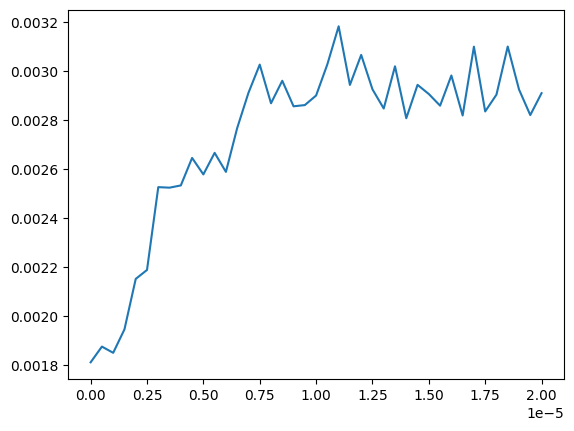

In [73]:
delays = data_ramsey['delays']
mag = np.abs(data_ramsey['Z'])
plt.plot(delays,mag)

In [74]:
# Const, Slope, Tr, freq, Phase
# initial parameter to fit
args_T2 = [6e-03,0.002,10e-6,2e-6,91] 

In [75]:
from scipy.optimize import curve_fit
# T2 exponential'


popt_e,pcov_e = curve_fit(Ramsey_e,delays,mag,args_T2,maxfev=100000,ftol=1e-30 )
#print(r'Rabi time (Exponential): {0:.2f} +- {1:.2f} µs'.format(popt_e[2]*1e6,pcov_e[2]*1e6))



In [76]:
popt_e[2]*1e6

3.6179416325139453

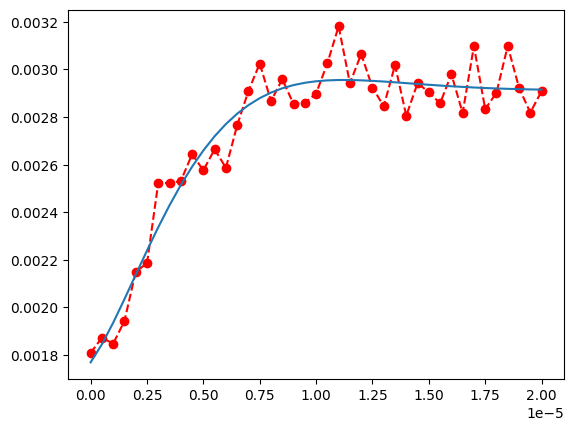

In [77]:
plt.plot(delays,mag,'r--o')
plt.plot(delays,Ramsey_e(delays,*popt_e))

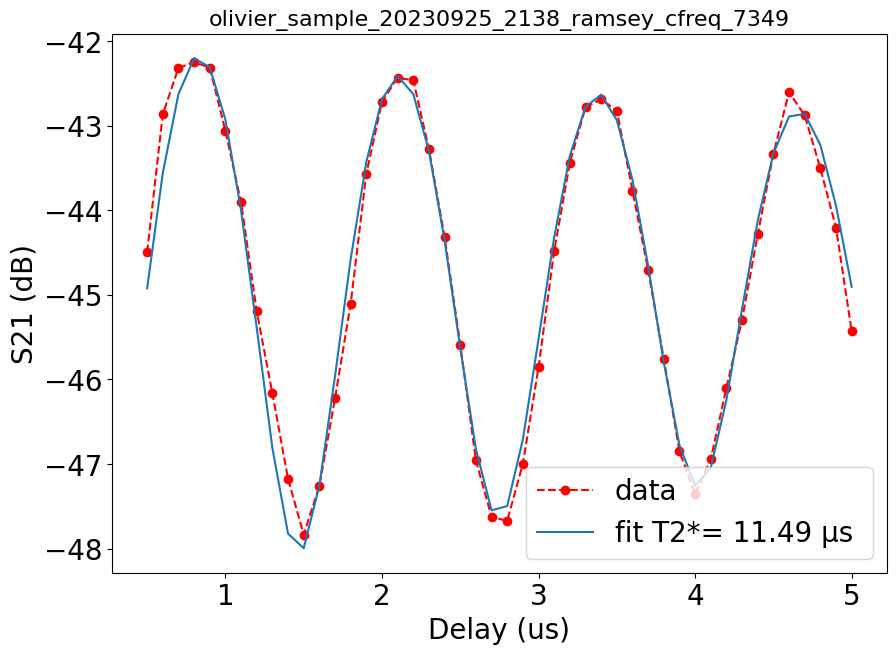

In [195]:
#freqMeasurement: 7349600000.0
#freqExcitation: 2150100000.0
#durationExcitation: 3.35e-07
#voltage: 0.16
#rf_excitation_amp: -10
#rf_measurement_amp: 18
#attenuator_att: 25
#if_freq: 70000000.0
#qubitname: olivier_sample
#voltageSourceState: True
#nBuffer: 50
#recordPerBuffers: 200
#waveformHeadCut: 500
#pulsesPeriod: 0.00059
#pulseMeasurementLength: 5e-06
#delayBetweenPulses_init: 0
#delayBetweenPulses_final: 5e-06
#delayBetweenPulses_step: 1e-07
#ampReference: -9
#decimation_value: 1
#roundDelayArray: 7
#timeToWaitForAWGUpload : 5
#currentResistance: 1000.0
#HOW TO PLOT
fig = plt.figure(figsize=(10,7))
ax = fig.gca()
plt.plot(delays*1e6,20*np.log10(mag),'r--o')
plt.plot(delays*1e6,20*np.log10(Ramsey_e(delays,*popt_e)))

ax.tick_params(labelsize=20)
ax.set_xlabel('Delay (us)',fontsize=20)
ax.set_ylabel('S21 (dB)',fontsize=20)
ax.set_title('olivier_sample_20230925_2138_ramsey_cfreq_7349',fontsize=16)
plt.legend(['data','fit T2*= 11.49 µs '],fontsize=20)
plt.show()



# Ramsey map

In [271]:
voltage = 0.16
rf_amp = 18
attenuator_att = 25
freqMeasurement = CavityFrequency
if_freq = 70e6
qubitname = 'olivier_sample'
voltageSourceState = True
nBuffer = 50
recordPerBuffers = 200
waveformHeadCut = 500
pulsesPeriod = 590e-6
pulseMeasurementLength = 5e-6
delayBetweenPulses = 0
ampReference = -9
decimation_value = 1 #  1 GHz/ decimation_value

rf_excitation_amp = -10
rf_measurement_amp= 18

delayBetweenPulses_init = 500e-9
delayBetweenPulses_final = 50E-6
delayBetweenPulses_step = 0.1e-6


durationExcitation_init = 120e-9
durationExcitation_final = 425e-9
durationExcitation_step = 10e-9

currentResistance = 1e3

freqExcitation = QubitFrequency

awg.stop()
try:
    get_error(awg._session,'')
except ValueError:
    pass

In [265]:
reload(ramsey_map)

<module 'measurements.ramsey_map' from 'C:\\Users\\Franscisco Rouxinol\\Developer\\MeasurementLFDQ\\src\\measurements\\ramsey_map.py'>

'olivier_sample_20230926_0711_ramsey_map_cfreq_7349.npz'

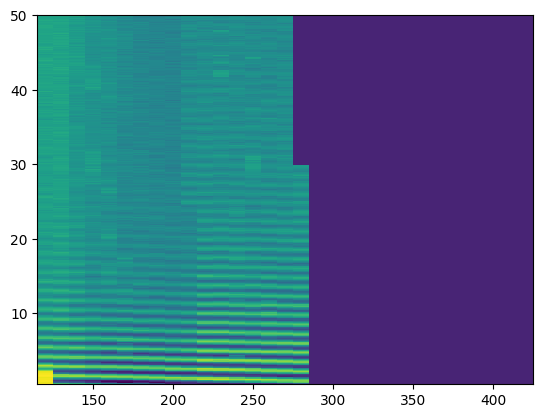

In [272]:
ramsey_map.measure(alazar,
            awg,
            att,
            RFsourceMeasurement,
            RFsourceExcitation,
            Voltsource,
            freqMeasurement,
            freqExcitation,
            durationExcitation_init,
            durationExcitation_final,
            durationExcitation_step,
            voltage,
            rf_excitation_amp,
            rf_measurement_amp,
            attenuator_att,
            if_freq,
            qubitname,
            voltageSourceState,
            nBuffer,
            recordPerBuffers,
            waveformHeadCut,
            pulsesPeriod,
            pulseMeasurementLength,
            delayBetweenPulses_init,
            delayBetweenPulses_final,
            delayBetweenPulses_step,
            ampReference,
            decimation_value,
            currentResistance,
            roundDelayArray = 8,
            timeToWaitForAWGUpload = 5,
            saveData = True)

In [241]:
data['durationExcitations']

array([2.e-07, 2.e-07, 3.e-07, 3.e-07, 3.e-07, 3.e-07, 3.e-07, 3.e-07,
       3.e-07, 3.e-07, 3.e-07, 3.e-07, 4.e-07, 4.e-07, 4.e-07, 4.e-07,
       4.e-07, 4.e-07, 4.e-07, 4.e-07])

# Pulse Debug

In [16]:
pointsPerRecord = int(pulseMeasurementLength*1e9/256)*256

In [17]:
pointsPerRecord

4864

In [19]:
I,Q = alazar.capture(0,pointsPerRecord,nBuffer,recordPerBuffers,ampReference,save=True,waveformHeadCut=waveformHeadCut, decimation_value = decimation_value, triggerLevel_volts=0.7, triggerRange_volts=1,TTL=True)

In [22]:
f = open('data.bin','rb')
data = f.read()
f.close()

In [23]:
a = np.frombuffer(data, dtype=np.uint8)

(0.0, 256.0)

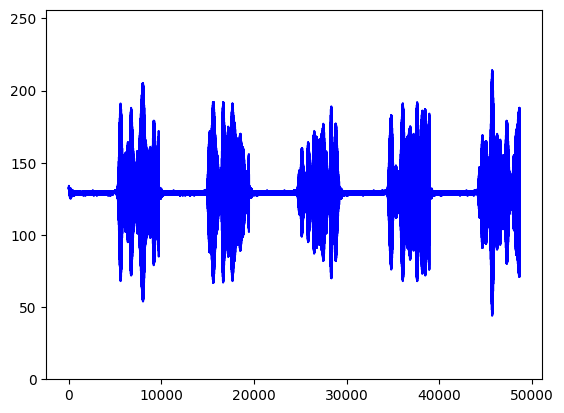

In [24]:
plt.plot(a[:pointsPerRecord*10],color='blue')
#plt.plot(a[pointsPerRecord:pointsPerRecord*2],color='orange')
plt.ylim(0,256)

# AWG DEBUG

In [39]:
def setMarker(index,marker_value):
    a = np.zeros(256)
    
    
    # converte para os dados especificados
    marker1 = np.zeros(len(a),dtype=int)
    marker1[:] = marker_value
    
    withmarker = np.array(tuple(zip(a,marker1))).flatten()

    data_arrstr = np.char.mod('%d', withmarker)
    #combine to a string
    data_str = ",".join(data_arrstr)
    
    SCPI_sock_send(awg._session, ':TRAC1:DATA 1,{},{}'.format(index,data_str))

In [103]:
freq = 70e6
numberOfChannels = 1
periodPerPacket,awgRate,sampleSizePacket = findAwgRateAndPeriod(freq,numberOfChannels)
awgRate = awgRate*numberOfChannels
awg.set_sampleRate(awgRate)


In [104]:
sampleSizePacket

1536

In [109]:
awg.stop()

In [106]:
SCPI_sock_send(awg._session,":TRAC1:DEL:ALL")
SCPI_sock_send(awg._session,":TRAC1:DEF 1,{},0".format(sampleSizePacket))
awg.getError()

In [107]:
phase = 180
x = np.arange(0,sampleSizePacket*1/awgRate,1/awgRate)
awgOsc = np.array((2**7-1)*np.sin(2*np.pi*(freq)*x),dtype=np.int8)

marker1 = np.zeros(len(awgOsc),dtype=int)
marker1[:] = 2

withmarker = np.array(tuple(zip(awgOsc,marker1))).flatten()

data_arrstr = np.char.mod('%d', withmarker)
#combine to a string
data_str = ",".join(data_arrstr)


SCPI_sock_send(awg._session, ':TRAC1:DATA 1,{},{}'.format(0,data_str))
awg.getError()

In [1003]:

x = np.arange(0,sampleSizePacket*1/awgRate,1/awgRate)
awgOsc = np.array((2**7-1)*np.sin(2*np.pi*(70e6)*x),dtype=np.int8)

marker1 = np.zeros(len(awgOsc),dtype=int)
marker1[:] = 1

withmarker = np.array(tuple(zip(awgOsc,marker1))).flatten()

data_arrstr = np.char.mod('%d', awgOsc)
#combine to a string
data_str = ",".join(data_arrstr)


SCPI_sock_send(awg._session, ':TRAC2:DATA 1,{},{}'.format(sampleSizePacket,data_str))
awg.getError()

In [108]:
awg.start()

In [1004]:
setMarker(0,0)
setMarker(sampleSizePacket,1)
awg.getError()

In [58]:
size1 = int(SCPI_sock_query(awg._session,':TRAC1:CAT?').split(',')[1])
data1 = SCPI_sock_query(awg._session,':TRAC1:DATA? 1, {},{}'.format(0,size1))
print(size1)

1536


In [59]:
size2 = int(SCPI_sock_query(awg._session,':TRAC2:CAT?').split(',')[1])
data2 = SCPI_sock_query(awg._session,':TRAC2:DATA? 1, {},{}'.format(0,size2))
print(size2)

1536


In [60]:
x1 = np.array(data1.split(','))
y1 = x1.astype(int)

x2 = np.array(data2.split(','))
y2 = x2.astype(int)

In [61]:
len(y1)

3072

In [62]:
len(y2)

1536

In [63]:
marker = y1[1::2]

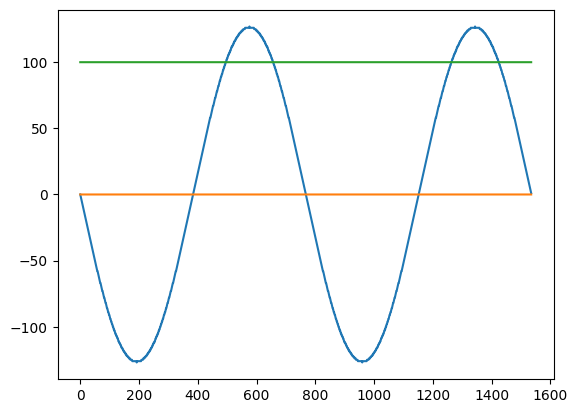

In [64]:
plt.plot(y1[0::2])
plt.plot(y2)
plt.plot(marker*50)

In [1012]:
awg.start()

In [997]:
awg.stop()

In [118]:
def resetPulseWithDelay(sampleSizeMeasurement,sampleSizeMeasurementPulse,sampleSizeExcitation,sampleSizeDelay):
    setMarker(sampleSizeMeasurement-sampleSizeMeasurementPulse-sampleSizeExcitation-sampleSizeDelay,0)
    setMarker(sampleSizeMeasurement-sampleSizeMeasurementPulse-sampleSizeDelay,0)
    
def setPulseWithDelay(sampleSizeMeasurement,sampleSizeMeasurementPulse,sampleSizeExcitation,sampleSizeDelay):
    setMarker(sampleSizeMeasurement-sampleSizeMeasurementPulse-sampleSizeExcitation-sampleSizeDelay,2)
    setMarker(sampleSizeMeasurement-sampleSizeMeasurementPulse-sampleSizeDelay,0)

def setPulseNextToMeasurement(sampleSizeMeasurement,sampleSizeMeasurementPulse,sampleSizeExcitation):
    setMarker(sampleSizeMeasurement-sampleSizeMeasurementPulse-sampleSizeExcitation,2)


    
def convertToSamples(awgRate,length):
    return  int(awgRate*length/512)*512

In [119]:
lengthMeasurementPulse = 4e-6
nPackets = lengthMeasurementPulse/periodPerPacket*freq
sampleSizeMeasurementPulse = int(sampleSizePacket*nPackets/256)*256

lengthExcitation = 15e-6
sampleSizeExcitation = convertToSamples(awgRate,lengthExcitation)

lengthMeasurement = 500e-6 
sampleSizeMeasurement = convertToSamples(awgRate,lengthMeasurement)

lengthDelay = 1e-6 
sampleSizeDelay = convertToSamples(awgRate,lengthDelay)

lengthHalfPiPulse = 0.120e-6
sampleSizeHalfPiPulse = convertToSamples(awgRate,lengthHalfPiPulse)

sampleSizeDelayBetweenPulses = sampleSizeExcitation-2*sampleSizeHalfPiPulse

In [120]:
awg.stop()
try:
    get_error(awg._session,'')
except ValueError:
    pass

In [121]:
awg.clearMemory()
try:
    get_error(awg._session,'')
except ValueError:
    pass

In [122]:
awg.defineSegment(sampleSizeMeasurement)
try:
    get_error(awg._session,'')
except ValueError:
    pass

In [123]:
awg.start()
try:
    get_error(awg._session,'')
except ValueError:
    pass

In [124]:
awg.setWave(freq,1, sampleSizeDelay+2*sampleSizeExcitation, sampleSizeMeasurementPulse,awgRate)
sleep(5)
try:
    get_error(awg._session,'')
except ValueError:
    pass


In [125]:
awg.setMarker(0,2)
try:
    get_error(awg._session,'')
except ValueError:
    pass


In [126]:

awg.setMarker(sampleSizeExcitation,0)
try:
    get_error(awg._session,'')
except ValueError:
    pass

In [127]:

awg.setMarker(sampleSizeDelay+sampleSizeExcitation,2)
try:
    get_error(awg._session,'')
except ValueError:
    pass

In [128]:

awg.setMarker(sampleSizeDelay+2*sampleSizeExcitation+sampleSizeMeasurementPulse,0)
try:
    get_error(awg._session,'')
except ValueError:
    pass